In [337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from catboost import CatBoost, CatBoostRegressor, CatBoostClassifier
from catboost import Pool
from sklearn.naive_bayes import BernoulliNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [339]:
df = pd.read_csv('train.csv').drop('ID', axis=1)

In [340]:
# from ctgan import CTGAN
# from joblib import parallel_backend

# real_data = df

# # discrete_columns = [

# #     'label'
# # ]


# from ctgan import CTGAN

# # All 65 non-ID columns are binary, so everything is “discrete”
# discrete_cols = [c for c in df.columns if c not in ("ID",)]

# ctgan = CTGAN(
#     # --- training ---
#     epochs=200,                # smaller network ⇒ more epochs OK
#     batch_size=100,             # 64 ≈ 1/9 of data; fits in RAM & keeps batches diverse
#     verbose=True,

#     # --- network sizes ---
#     embedding_dim=32,          # 32 is plenty for binary categories (min(32, n_unique//2) = 1)
#     generator_dim=(128, 128),  # 2 hidden layers, moderate width
#     discriminator_dim=(128, 128),

#     # --- optimisation ---
#     generator_lr=2e-4,
#     discriminator_lr=2e-4,
#     generator_decay=1e-6,
#     discriminator_decay=1e-6,
#     discriminator_steps=1,     # default; >1 rarely helps on small data

#     # --- regularisation tricks ---
#     pac=5,                     # “PacGAN” mode combats mode-collapse with small data
#     cuda=False                 # force CPU to bypass the CUDA DLL that triggered WinError 1455
# )

# # ctgan.fit(df[discrete_cols], discrete_cols)

# # with parallel_backend('loky', n_jobs=1):  # or n_jobs=2

# #     ctgan.fit(df, discrete_columns)

# # synthetic_data = ctgan.sample(200)
# # df = pd.concat([synthetic_data, df]).reset_index(drop=True)

In [341]:
X = df.drop(columns=["label"])
y = df["label"]

In [342]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE



smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_resampled["label"] = y_resampled
df=X_resampled

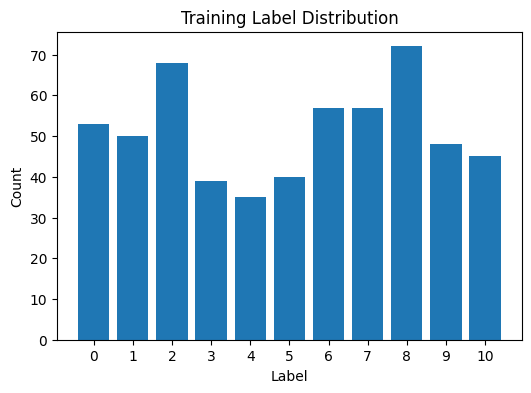

In [343]:
labels, counts = np.unique(y, return_counts=True)
plt.figure(figsize=(6,4))
plt.bar(labels.astype(str), counts)
plt.title('Training Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [293]:
# X_scaled_df['label'] = X_resampled['label'] 
# df = X_scaled_df

In [294]:
df

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,label
0,1,1,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,3
1,0,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,3
2,1,1,1,1,0,0,1,1,0,1,...,1,1,1,1,0,0,0,0,0,3
3,1,0,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,1,0,0,7
4,1,1,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10
788,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,10
789,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,10
790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10


In [295]:
# synthetic_data.drop('ID', axis = 1, inplace =True)

In [296]:
# df.drop('ID', axis = 1, inplace =True)

In [ ]:
test = pd.read_csv('test.csv')
test.drop('ID', axis=1, inplace=True)
test.reset_index(drop =True, inplace=True)


In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset
# import numpy as np


# # Prepare data
# X_train = df.drop(columns=[ "label"]).values.astype(np.float32)
# y_train = df["label"].values.astype(np.int64)
# X_test = test.drop(columns=["index"]).values.astype(np.float32)

# # Define the MLP model
# class MLP(nn.Module):
#     def __init__(self, input_dim, hidden_dims=(1024,512,256,128, 64), output_dim=11): 
#         super().__init__()
#         self.hidden = nn.Sequential(
#             nn.Linear(input_dim, 1024),
#             nn.ReLU(),
#             nn.Linear(1024, 512),
#             nn.ReLU(),
#             nn.Linear(512, 128),
#             nn.ReLU(),
#             nn.Linear(128, 64),
#             nn.ReLU(),
#             nn.Linear(64, 32),
            
#         )
#         self.relu = nn.ReLU()
#         self.output = nn.Sequential(
#             nn.Linear(32, 32),
#             # nn.ReLU(),
#             # nn.Linear(256, 128),
#             # nn.ReLU(),
#             # nn.Linear(128, 32),
#             nn.ReLU(),
#             nn.Linear(32, output_dim),

#         )

#     def forward(self, x):
#         x = self.hidden(x)
#         x = self.relu(x)
#         return self.output(x)

#     def extract_features(self, x):
#         return self.hidden(x) 

# input_dim = X_train.shape[1]
# mlp = MLP(input_dim=input_dim)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# mlp.to(device)

# optimizer = optim.Adam(mlp.parameters(), lr=0.003)
# criterion = nn.CrossEntropyLoss()
# epochs = 10
# batch_size = 16

# train_loader = DataLoader(TensorDataset(torch.tensor(X_train), torch.tensor(y_train)),
#                           batch_size=batch_size, shuffle=True)

# for epoch in range(epochs):
#     mlp.train()
#     for xb, yb in train_loader:
#         xb, yb = xb.to(device), yb.to(device)
#         optimizer.zero_grad()
#         logits = mlp(xb)
#         loss = criterion(logits, yb) * 100000
#         loss.backward()
#         optimizer.step()
#     # print(logits.argmax(1), yb)
#     mlp.eval()
#     with torch.no_grad():
#         test_logits = mlp(torch.tensor(X_test).to(device))
#         test_preds = torch.argmax(test_logits, dim=1).cpu().numpy()
#         s = accuracy_score(np.array(test_logits.argmax(1).cpu()), np.array(y_test['target']))

#     print(f"Epoch {epoch + 1}/{epochs} | Train Loss: {loss.item():.4f} | Test Output Shape: {s}")

# mlp.eval()
# with torch.no_grad():
#     train_features = mlp.extract_features(torch.tensor(X_train).to(device)).cpu().numpy()
#     test_features = mlp.extract_features(torch.tensor(X_test).to(device)).cpu().numpy()

# train_feature_cols = [f"mlp_feat_{i}" for i in range(train_features.shape[1])]
# test_feature_cols = [f"mlp_feat_{i}" for i in range(test_features.shape[1])]

# for i, col in enumerate(train_feature_cols):
#     df[col] = train_features[:, i]

# for i, col in enumerate(test_feature_cols):
#     test[col] = test_features[:, i]

# df

Epoch 1/10 | Train Loss: 25148.8535 | Test Output Shape: 0.17482517482517482
Epoch 2/10 | Train Loss: 25.8210 | Test Output Shape: 0.1958041958041958
Epoch 3/10 | Train Loss: 77.2264 | Test Output Shape: 0.26573426573426573
Epoch 4/10 | Train Loss: 31.2363 | Test Output Shape: 0.2727272727272727
Epoch 5/10 | Train Loss: 1.9371 | Test Output Shape: 0.27972027972027974
Epoch 6/10 | Train Loss: 6.1311 | Test Output Shape: 0.27972027972027974
Epoch 7/10 | Train Loss: 3.2185 | Test Output Shape: 0.27972027972027974
Epoch 8/10 | Train Loss: 2.9205 | Test Output Shape: 0.27972027972027974
Epoch 9/10 | Train Loss: 0.6825 | Test Output Shape: 0.27972027972027974
Epoch 10/10 | Train Loss: 3.0799 | Test Output Shape: 0.27972027972027974


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,mlp_feat_502,mlp_feat_503,mlp_feat_504,mlp_feat_505,mlp_feat_506,mlp_feat_507,mlp_feat_508,mlp_feat_509,mlp_feat_510,mlp_feat_511
0,1,1,0,1,1,1,1,0,1,1,...,-0.808503,0.004178,-1.241154,-1.267655,-1.577396,5.611116,4.508015,0.086186,-1.108425,-0.726529
1,0,1,1,1,0,1,1,1,1,1,...,-1.529261,-0.392265,-7.434128,-2.554436,-2.429539,10.250200,4.910422,-5.607927,-2.806099,-1.514008
2,1,1,1,1,0,0,1,1,0,1,...,-1.383896,-0.305418,-6.676453,-2.329101,-2.367144,9.990671,5.232395,-4.900574,-2.496643,-1.316902
3,1,0,0,0,1,0,0,1,1,1,...,-1.277245,-4.029014,-1.233026,-3.121766,-1.981165,-3.471600,0.493428,0.321879,-1.943901,0.465479
4,1,1,1,1,1,1,0,0,1,1,...,-1.561965,-0.685580,-2.366149,-2.127692,-2.301685,12.764889,22.969774,-3.545784,-2.436770,-1.269199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,0,0,0,0,0,0,0,0,0,1,...,-2.597370,-2.268068,-9.423201,-7.026139,-5.074817,-2.732399,1.126778,-4.491387,-3.379987,16.445610
788,0,0,0,0,0,0,1,1,0,0,...,-1.857017,-1.894309,-6.748350,-4.863965,-3.317651,-2.662413,-0.509084,-2.863708,-2.452474,10.224792
789,0,1,0,0,0,0,0,1,0,0,...,-1.578489,-2.035874,-6.954126,-4.636048,-3.466160,-1.909337,0.615776,-4.340552,-2.010994,10.894276
790,0,0,0,0,0,0,0,0,0,0,...,-1.834904,-2.059511,-7.230900,-4.981273,-3.532835,-2.444486,0.135550,-3.711625,-2.469263,11.160611


In [299]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

# Features and labe

In [ ]:
# selector_model = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1)
# selector = SelectFromModel(selector_model, threshold="median")  # keep top 50% features

# selector.fit(X, y)

# # Transform datasets
# X_selected_train = selector.transform(X)
# X_selected_val = selector.transform(test.drop('index', axis=1))

# # Show number of selected features
# print(f"Selected features: {X_selected_train.shape[1]} out of {X.shape[1]}")


Selected features: 288 out of 576


In [301]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
import optuna
import numpy as np

X = df.drop(columns=[ 'label'])
y = df['label']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def cross_val_score_model(model, X, y):
    scores = []
    for train_idx, valid_idx in cv.split(X, y):
        X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
        model.fit(X_train, y_train)
        preds = model.predict(X_valid)
        scores.append(accuracy_score(y_valid, preds))
    return np.mean(scores)

def objective_bnb(trial):
    alpha = trial.suggest_loguniform('alpha', 1e-3, 10.0)
    model = BernoulliNB(alpha=alpha)
    return cross_val_score_model(model, X, y)

study_bnb = optuna.create_study(direction='maximize', study_name='bnb_opt')
study_bnb.optimize(objective_bnb, n_trials=50)
print('BernoulliNB best params:', study_bnb.best_params)
print('BernoulliNB best CV accuracy:', study_bnb.best_value)

def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'mlogloss'
    }
    model = XGBClassifier(**params)
    return cross_val_score_model(model, X, y)

study_xgb = optuna.create_study(direction='maximize', study_name='xgb_opt')
study_xgb.optimize(objective_xgb, n_trials=10)
print('XGB best params:', study_xgb.best_params)
print('XGB best CV accuracy:', study_xgb.best_value)

def objective_brf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 5, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'n_jobs': -1,
        'random_state': 42
    }
    model = BalancedRandomForestClassifier(**params)
    return cross_val_score_model(model, X, y)

study_brf = optuna.create_study(direction='maximize', study_name='brf_opt')
study_brf.optimize(objective_brf, n_trials=10)
print('BalancedRF best params:', study_brf.best_params)
print('BalancedRF best CV accuracy:', study_brf.best_value)


[I 2025-05-30 22:52:22,545] A new study created in memory with name: bnb_opt
[I 2025-05-30 22:52:22,597] Trial 0 finished with value: 0.36108590080407615 and parameters: {'alpha': 1.5569512147741704}. Best is trial 0 with value: 0.36108590080407615.
[I 2025-05-30 22:52:22,647] Trial 1 finished with value: 0.36741501472812677 and parameters: {'alpha': 0.045020046034829446}. Best is trial 1 with value: 0.36741501472812677.
[I 2025-05-30 22:52:22,715] Trial 2 finished with value: 0.3661571530929066 and parameters: {'alpha': 0.00942566426921559}. Best is trial 1 with value: 0.36741501472812677.
[I 2025-05-30 22:52:22,770] Trial 3 finished with value: 0.36741501472812677 and parameters: {'alpha': 0.03925801068672394}. Best is trial 1 with value: 0.36741501472812677.
[I 2025-05-30 22:52:22,816] Trial 4 finished with value: 0.3636095852241064 and parameters: {'alpha': 0.5670222078996099}. Best is trial 1 with value: 0.36741501472812677.
[I 2025-05-30 22:52:22,861] Trial 5 finished with value:

BernoulliNB best params: {'alpha': 0.045020046034829446}
BernoulliNB best CV accuracy: 0.36741501472812677


[I 2025-05-30 22:52:39,057] Trial 0 finished with value: 0.5099912427354509 and parameters: {'n_estimators': 417, 'max_depth': 11, 'learning_rate': 0.013217170431888397, 'subsample': 0.7326041691404042, 'colsample_bytree': 0.6673856336579235}. Best is trial 0 with value: 0.5099912427354509.
[I 2025-05-30 22:52:50,213] Trial 1 finished with value: 0.5049677573441606 and parameters: {'n_estimators': 563, 'max_depth': 6, 'learning_rate': 0.09661690853354525, 'subsample': 0.6779997140954253, 'colsample_bytree': 0.6278229815829457}. Best is trial 0 with value: 0.5099912427354509.
[I 2025-05-30 22:53:13,811] Trial 2 finished with value: 0.5175941405939017 and parameters: {'n_estimators': 697, 'max_depth': 10, 'learning_rate': 0.014237002804084352, 'subsample': 0.9466494970293257, 'colsample_bytree': 0.6907650804262255}. Best is trial 2 with value: 0.5175941405939017.
[I 2025-05-30 22:53:26,088] Trial 3 finished with value: 0.5050075630921105 and parameters: {'n_estimators': 588, 'max_depth':

XGB best params: {'n_estimators': 697, 'max_depth': 10, 'learning_rate': 0.014237002804084352, 'subsample': 0.9466494970293257, 'colsample_bytree': 0.6907650804262255}
XGB best CV accuracy: 0.5175941405939017


[I 2025-05-30 22:54:54,714] Trial 0 finished with value: 0.45699386991481566 and parameters: {'n_estimators': 998, 'max_depth': 32, 'min_samples_split': 15, 'min_samples_leaf': 9, 'bootstrap': False}. Best is trial 0 with value: 0.45699386991481566.
[I 2025-05-30 22:55:02,503] Trial 1 finished with value: 0.4671443356420667 and parameters: {'n_estimators': 323, 'max_depth': 43, 'min_samples_split': 17, 'min_samples_leaf': 5, 'bootstrap': False}. Best is trial 1 with value: 0.4671443356420667.
[I 2025-05-30 22:55:07,535] Trial 2 finished with value: 0.4544861077939655 and parameters: {'n_estimators': 209, 'max_depth': 32, 'min_samples_split': 15, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 1 with value: 0.4671443356420667.
[I 2025-05-30 22:55:11,968] Trial 3 finished with value: 0.45704959796194566 and parameters: {'n_estimators': 190, 'max_depth': 16, 'min_samples_split': 19, 'min_samples_leaf': 8, 'bootstrap': False}. Best is trial 1 with value: 0.4671443356420667.
[I 202

BalancedRF best params: {'n_estimators': 973, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}
BalancedRF best CV accuracy: 0.5277207228723828


In [305]:
study_bnb.best_params

{'alpha': 0.045020046034829446}

In [307]:
df

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,label
0,1,1,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,3
1,0,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,3
2,1,1,1,1,0,0,1,1,0,1,...,1,1,1,1,0,0,0,0,0,3
3,1,0,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,1,0,0,7
4,1,1,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10
788,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,10
789,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,10
790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10


In [331]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(
    hidden_layer_sizes=(784, 512, 128, 64),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=100,
    random_state=42
)

X = df.drop(columns=["label"])
y = df["label"]


              

# bnb_model =
voting_clf = VotingClassifier(estimators=[
    # ('svc', SVC(gamma="auto", probability=True, random_state=42)),
#             'svc_li': SVC(kernel="linear", gamma="auto", probability=True, random_state=self.random_state),
            ('svc_po', SVC(kernel="poly", gamma="auto", probability=True, random_state=42)),
            # ('svc_si', SVC(kernel="sigmoid", gamma="auto", probability=True, random_state=42)),
    ('bnb',  BernoulliNB(alpha = 0.51)),
    ('bnb2',  BernoulliNB(alpha = 0.8)),
    ('bnb3',  BernoulliNB(**study_bnb.best_params)),
    ('bnb4',  BernoulliNB(alpha = 1.5)),
    ('bnb5',  BernoulliNB(alpha = 2)),
    # ('bnb6',  BernoulliNB(alpha = 0.5)),



    # ('lr', LogisticRegression(max_iter=10000, random_state=42, n_jobs=-1)),
    ('xgb', XGBClassifier(**study_xgb.best_params)),
    # ('lgb', lgb.LGBMClassifier(**lgb_params)),
    # ('cat', CatBoostClassifier(**cb_params)),
    ('brf', BalancedRandomForestClassifier(**study_brf.best_params)),
    ('rf', RandomForestClassifier(n_estimators=200,max_depth = 20 , random_state=42)),
    # ('rf2', RandomForestClassifier(n_estimators=300,max_depth = 30 , random_state=42)),
    # ('rf3', RandomForestClassifier(n_estimators=400,max_depth = 40 , random_state=42)),
    ('rf4', RandomForestClassifier(n_estimators=280,max_depth = 30 , min_samples_leaf=1 , min_samples_split=11 , bootstrap=False ,   random_state=42)),
    # ('mlp',  mlp_logits)
], voting='soft')

voting_clf.fit(X, y)

y_pred = voting_clf.predict(pd.DataFrame(test).drop('index', axis=1))

# accuracy = accuracy_score(y_test['target'], y_pred)
# report = classification_report(y_test['target'], y_pred, output_dict=False)

# accuracy, report


In [ ]:
# y_pred.to_csv('y_pred.csv')

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score


In [326]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled.drop('label', axis=1))
X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns[:-1])

In [327]:
def objective(trial):
    xgb_params_trial = {
        'n_estimators': trial.suggest_int('xgb_n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('xgb_max_depth', 3, 15),
        'learning_rate': trial.suggest_loguniform('xgb_lr', 1e-3, 1.0),
        'subsample': trial.suggest_uniform('xgb_subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('xgb_cbt', 0.3, 1.0),
        'reg_alpha': trial.suggest_loguniform('xgb_alpha', 1e-8, 10.0),
        'reg_lambda': trial.suggest_loguniform('xgb_lambda', 1e-8, 10.0),
        'tree_method': 'hist',
        'objective': 'multi:softprob',
        'verbosity': 0,
        'n_jobs': -1,
        'random_state': 42
    }
    brf_params_trial = {
        'n_estimators': trial.suggest_int('brf_n_estimators', 100, 3000),
        'max_depth': trial.suggest_int('brf_max_depth', 5, 50),
        'min_samples_split': trial.suggest_int('brf_min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('brf_min_samples_leaf', 1, 10),
        'bootstrap': trial.suggest_categorical('brf_bootstrap', [True, False]),
        'random_state': 42
    }

    clf = VotingClassifier(estimators=[
        ('bnb1', BernoulliNB(alpha=0.01)),
        ('bnb2', BernoulliNB(alpha=1.2)),
        ('bnb3', BernoulliNB(alpha=2)),
        ('lr',   LogisticRegression(max_iter=10000, random_state=42, n_jobs=-1)),
        ('xgb',  XGBClassifier(**xgb_params_trial)),
        ('brf',  BalancedRandomForestClassifier(**brf_params_trial)),
        ('rf1',  RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)),
        ('rf2',  RandomForestClassifier(n_estimators=300, max_depth=30, random_state=42)),
        ('rf3',  RandomForestClassifier(
            n_estimators=280, max_depth=30,
            min_samples_leaf=1, min_samples_split=11,
            bootstrap=False, random_state=42
        )),
    ], voting='soft', n_jobs=-1)

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X_scaled_df, y_resampled, cv=cv, scoring='accuracy', n_jobs=-1)
    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20, timeout=600)

print("Best trial:")
print(study.best_trial.params)


[I 2025-05-30 23:42:35,138] A new study created in memory with name: no-name-4f2d0ae0-d15e-4ed4-871b-93a14d54919e


[I 2025-05-30 23:42:41,205] Trial 0 finished with value: 0.38888888888888884 and parameters: {'xgb_n_estimators': 284, 'xgb_max_depth': 6, 'xgb_lr': 0.0018397321885300403, 'xgb_subsample': 0.7832803242256716, 'xgb_cbt': 0.5432037586367516, 'xgb_alpha': 4.689838029406961e-06, 'xgb_lambda': 0.011519915693040549, 'brf_n_estimators': 1174, 'brf_max_depth': 25, 'brf_min_samples_split': 9, 'brf_min_samples_leaf': 9, 'brf_bootstrap': True}. Best is trial 0 with value: 0.38888888888888884.
[I 2025-05-30 23:42:50,938] Trial 1 finished with value: 0.4065656565656566 and parameters: {'xgb_n_estimators': 919, 'xgb_max_depth': 5, 'xgb_lr': 0.004474623508189751, 'xgb_subsample': 0.5266512312205076, 'xgb_cbt': 0.9381464539826139, 'xgb_alpha': 0.0067809368757091055, 'xgb_lambda': 5.834813073915649e-07, 'brf_n_estimators': 2312, 'brf_max_depth': 43, 'brf_min_samples_split': 13, 'brf_min_samples_leaf': 9, 'brf_bootstrap': True}. Best is trial 1 with value: 0.4065656565656566.
[I 2025-05-30 23:42:56,707]

Best trial:
{'xgb_n_estimators': 765, 'xgb_max_depth': 11, 'xgb_lr': 0.02542603138170506, 'xgb_subsample': 0.6480191848341129, 'xgb_cbt': 0.8085782276358953, 'xgb_alpha': 1.8806364320147058e-08, 'xgb_lambda': 4.5958248944322875e-06, 'brf_n_estimators': 175, 'brf_max_depth': 36, 'brf_min_samples_split': 2, 'brf_min_samples_leaf': 1, 'brf_bootstrap': False}


In [328]:
best_params = study.best_trial.params

best_xgb = XGBClassifier(
    n_estimators=best_params['xgb_n_estimators'],
    max_depth=best_params['xgb_max_depth'],
    learning_rate=best_params['xgb_lr'],
    subsample=best_params['xgb_subsample'],
    colsample_bytree=best_params['xgb_cbt'],
    reg_alpha=best_params['xgb_alpha'],
    reg_lambda=best_params['xgb_lambda'],
    tree_method='hist', objective='multi:softprob',
    verbosity=0, n_jobs=-1, random_state=42
)
best_brf = BalancedRandomForestClassifier(
    n_estimators=best_params['brf_n_estimators'],
    max_depth=best_params['brf_max_depth'],
    min_samples_split=best_params['brf_min_samples_split'],
    min_samples_leaf=best_params['brf_min_samples_leaf'],
    bootstrap=best_params['brf_bootstrap'],
    random_state=42
)


In [329]:

final_clf = VotingClassifier(estimators=[
    ('bnb1', BernoulliNB(alpha=0.01)),
    ('bnb2', BernoulliNB(alpha=1.2)),
    ('bnb3', BernoulliNB(alpha=2)),
    ('lr',   LogisticRegression(max_iter=10000, random_state=42, n_jobs=-1)),
    ('xgb',  best_xgb),
    ('brf',  best_brf),
    ('rf1',  RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)),
    ('rf2',  RandomForestClassifier(n_estimators=300, max_depth=30, random_state=42)),
    ('rf3',  RandomForestClassifier(
        n_estimators=280, max_depth=30,
        min_samples_leaf=1, min_samples_split=11,
        bootstrap=False, random_state=42
    )),
], voting='soft', n_jobs=-1)

final_clf.fit(X_scaled_df, y_resampled)


VotingClassifier(estimators=[('bnb1', BernoulliNB(alpha=0.01)),
                             ('bnb2', BernoulliNB(alpha=1.2)),
                             ('bnb3', BernoulliNB(alpha=2)),
                             ('lr',
                              LogisticRegression(max_iter=10000, n_jobs=-1,
                                                 random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8085782276358953,
                                            device=None,...
                              BalancedRandomForestClassifier(max_depth=36,
                                                             n_estimators=175,
                                                             random_state=42)),
                             ('rf1',
                              RandomForestClassifier(max_depth=20,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('rf2',
                              RandomForestClassifier(max_depth=30,
                                                     n_estimators=300,
                                                     random_state=42)),
                             ('rf3',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=30,
                                                     min_samples_split=11,
                                                     n_estimators=280,
                                                     random_state=42))],
                 n_jobs=-1, voting='soft')

In [332]:
y_pred = final_clf.predict(pd.DataFrame(test).drop('index', axis=1))


In [333]:
y_pred = pd.DataFrame(y_pred)

In [335]:
y_pred.reset_index(inplace=True)

In [336]:
y_pred

,index,0
0,0,0
1,1,8
2,2,7
3,3,3
4,4,0
...,...,...
138,138,8
139,139,1
140,140,0
141,141,9


In [ ]:
y_pred.to_csv('sub1.csv')